<a href="https://colab.research.google.com/github/Santphe14/IA--Santiago-caicedo-pe-a/blob/main/Taller_KNN_Aparicio_Caicedo_Yepes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/4_Taller_KNN_y_Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller KNN y Árboles de Decisión**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Santiago Caicedo
- Samuel Aparicio
- Fabian Yepes

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_KNN_apellidos.ipynb”.

**Plazo de entrega**

11 de noviembre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.



### **Contexto del Caso**

Un banco portugués lo ha contratado como consultor de ciencia de datos. El banco tiene un problema de eficiencia: sus campañas de telemercadeo para ofrecer depósitos a plazo tienen una tasa de éxito muy baja. Se invierte mucho tiempo y recursos (costos de call center) llamando a clientes que no están interesados.

**Su misión:** Construir y optimizar modelos de Machine Learning que predigan qué clientes tienen mayor probabilidad de decir **"sí"** a la oferta (`y = 'yes'`).

El banco no solo quiere un modelo preciso, también quiere entender **POR QUÉ** un cliente es un buen prospecto. Su segundo objetivo es identificar cuáles son las **variables más relevantes** que usan los modelos para tomar sus decisiones. Esto permitirá al banco no solo enfocar sus llamadas, sino también crear mejores guiones de marketing y entender mejor a su clientela.

**El Dataset:** `bank-additional.csv` se encuentra en el repositorio del curso. Contiene información de más de 4.000 contactos de telemercadeo, incluyendo datos demográficos del cliente e información de la campaña (último contacto, resultado anterior).

**Para mayor información y descripción de las variables:** https://archive.ics.uci.edu/dataset/222/bank+marketing

## 1. Preparación del Entorno y Datos

### 1.1. Carga de Librerías

Importe todas las librerías necesarias. Para problemas de clasificación se usa KNeighborsClassifier y DecisionTreeClassifier.

In [ ]:
### TU CÓDIGO AQUÍ ###
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor  # <--- Añadido KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree # <--- Versión de Regresión
from sklearn.metrics import mean_squared_error, r2_score # <--- Métricas de Regresión
from sklearn.inspection import permutation_importance # <--- Para Feature Importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Mejorar visualización de dataframes y gráficos

In [ ]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### 1.2. Carga y Exploración Inicial

In [ ]:
# 1.2.1: Cargue el dataset
# ### TU CÓDIGO AQUÍ ###
# Usa sep=';'
df=pd.read_csv('bank-additional.csv', sep=';')

In [ ]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:

df.drop(columns=["duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"], inplace=True)

# 1.2.2: Muestre las primeras 5 filas
# ### TU CÓDIGO AQUÍ ###
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,no


In [ ]:
# 1.2.3: Use .info() para revisar los tipos de datos y los nulos
# ### TU CÓDIGO AQUÍ ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4119 non-null   int64 
 1   job          4119 non-null   object
 2   marital      4119 non-null   object
 3   education    4119 non-null   object
 4   default      4119 non-null   object
 5   housing      4119 non-null   object
 6   loan         4119 non-null   object
 7   contact      4119 non-null   object
 8   month        4119 non-null   object
 9   day_of_week  4119 non-null   object
 10  campaign     4119 non-null   int64 
 11  pdays        4119 non-null   int64 
 12  previous     4119 non-null   int64 
 13  poutcome     4119 non-null   object
 14  y            4119 non-null   object
dtypes: int64(4), object(11)
memory usage: 482.8+ KB


**Escriba un análisis de lo obseervado en `info()`:**
Dado el tipo de datos de la base, qué preprocesamientos hay que realizar antes de correr los modelos?

- Base de datos no tienen valores nulos en la muestra por lo cual facilita el proceso de preparacion de la base, por su parte es necesario realizar una estandarizacion de las variables para poder compararlas todas entre si en el modelo, de tal forma que no eistan sesgos o un modelo poco eficiente.

In [ ]:
# 1.2.4: Revise el balance de la variable objetivo 'y'
# Use .value_counts() con normalize=True

# ### TU CÓDIGO AQUÍ ###
df['y'].value_counts(normalize=True)

,proportion
y,
no,0.89
yes,0.11


**Escriba un análisis de la variable objetivo:**
¿Es un dataset desbalanceado? ¿Esto tiene lógica? ¿Qué implicaciones tiene esto respecto a las métricas que debemos usar?
- Sí. La clase positiva (y = 'yes') es minoritaria (11%).
Una regla empírica: cuando una clase está por debajo del 20–30% ya conviene tratarlo como desbalanceo.
- Sí. En campañas de telemercadeo bancario las tasas de aceptación suelen ser bajas: la mayoría de clientes no acepta la oferta. El objetivo del banco es encontrar a los pocos que sí aceptarían para reducir costos de llamadas y mejorar la conversión.
- Con desbalance, las métricas deben enfocarse en la capacidad del modelo para detectar la clase positiva y su utilidad de negocio

## 2. Preprocesamiento (Usando Pipelines)

Vamos a definir nuestro `X` e `y`, y luego crear un `ColumnTransformer` que se encargue de aplicar `StandardScaler` a los números y `OneHotEncoder` a las categorías.

In [ ]:
# 2.1: Separe X (predictoras) e y (objetivo)

# ### TU CÓDIGO AQUÍ ###
X = df.drop(columns='y')
y = df['y']

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

['age', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [ ]:
# 2.2: Divida en train y test (80/20)
# ¡Use stratify=y para mantener la proporción de 'yes' y 'no' en ambos sets!

# ### TU CÓDIGO AQUÍ ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño Train: {X_train.shape}")
print(f"Tamaño Test: {X_test.shape}")

Tamaño Train: (3295, 14)
Tamaño Test: (824, 14)


In [ ]:
# 2.3: Identifique automáticamente las columnas numéricas y categóricas

# ### TU CÓDIGO AQUÍ ###

print("Columnas Numéricas:")
print(numerical_features)
print("\nColumnas Categóricas:")
print(categorical_features)

Columnas Numéricas:
['age', 'campaign', 'pdays', 'previous']

Columnas Categóricas:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


## 3. Modelo 1: KNN

Ahora uniremos el preprocesador y el clasificador KNN en un solo `Pipeline` y usaremos `GridSearchCV` para encontrar el mejor `k`.

In [ ]:
# 3.1: Cree el Pipeline completo de KNN
# (una el 'preprocessor' con el modelo 'KNeighborsClassifier')

# ### TU CÓDIGO AQUÍ ###

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])


# 3.2: Definir la grilla de hiperparámetros para KNN
# Queremos probar k = 3, 5, 7, 11 (valores impares para evitar empates)
# Pista: El nombre DEBE ser 'model__n_neighbors' (por el nombre en el pipeline)

# ### TU CÓDIGO AQUÍ ###
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 11] # Probaremos estos valores de k
}

# 3.3: Configurar y ejecutar GridSearchCV
# Use 3 folds (cv=3) para que corra más rápido.
# Use scoring='recall_macro'.

# ### TU CÓDIGO AQUÍ ###
grid_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=3, scoring='recall_macro')
print("Iniciando GridSearchCV para KNN...")
grid_knn.fit(X_train, y_train)
print("GridSearchCV para KNN completado.")


# 3.4: Mostrar los mejores resultados
print(f"Mejor valor de 'k' para KNN: {grid_knn.best_params_}")
print(f"Mejor Recall-Macro: {grid_knn.best_score_:.4f}")

Iniciando GridSearchCV para KNN...
GridSearchCV para KNN completado.
Mejor valor de 'k' para KNN: {'model__n_neighbors': 3}
Mejor Recall-Macro: 0.5922


## 4. Modelo 2: Árbol de Decisión

Repetiremos el proceso con un Árbol de Decisión. Esta vez, los hiperparámetros que ajustaremos serán `max_depth` (para evitar sobreajuste) y `min_samples_leaf`.

In [ ]:
# 4.1: Crear el Pipeline completo para el Árbol de Decisión
# (une el 'preprocessor' con el modelo 'DecisionTreeClassifier')

# ### TU CÓDIGO AQUÍ ###
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

# 4.2: Definir la grilla de hiperparámetros para el Árbol
# Probaremos 'max_depth' = [3, 5, 7]
# Y 'min_samples_leaf' = [20, 50, 100] (para controlar la complejidad)

# ### TU CÓDIGO AQUÍ ###
param_grid_tree = {
    'model__max_depth': [3, 5, 7],
    'model__min_samples_leaf': [20, 50, 100]
}

# 4.3: Configurar y ejecutar GridSearchCV
# Al igual que en KNN, use 3 folds (cv=3) para que corra más rápido.
# Use scoring='recall_macro'.
# ### TU CÓDIGO AQUÍ ###
grid_tree = GridSearchCV(tree_pipeline, param_grid_tree, cv=3, scoring='recall_macro')

print("Iniciando GridSearchCV para Árbol de Decisión...")
grid_tree.fit(X_train, y_train)
print("GridSearchCV para Árbol de Decisión completado.")

# 4.4: Mostrar los mejores resultados
print(f"Mejores hiperparámetros para el Árbol: {grid_tree.best_params_}")
print(f"Mejor Recall-Macro: {grid_tree.best_score_:.4f}")

Iniciando GridSearchCV para Árbol de Decisión...
GridSearchCV para Árbol de Decisión completado.
Mejores hiperparámetros para el Árbol: {'model__max_depth': 3, 'model__min_samples_leaf': 50}
Mejor Recall-Macro: 0.6013


## 5. Evaluación Final y Recomendación de Modelo

El Árbol de Decisión probablemente dio un mejor `recall-macro` (y es más rápido e interpretable). Vamos a declararlo nuestro **modelo ganador** y evaluarlo en el `test set` (nuestro examen final imparcial).

In [ ]:
# 5.1: Obtener el mejor modelo de árbol (el 'best_estimator_')

# ### TU CÓDIGO AQUÍ ###
best_tree_model = grid_tree.best_estimator_

# 5.2: Realizar predicciones sobre el conjunto de PRUEBA (X_test)

# ### TU CÓDIGO AQUÍ ###
y_pred_tree = best_tree_model.predict(X_test)


# 5.3: Imprimir el Reporte de Clasificación
print("--- Reporte de Clasificación Final (Árbol Optimizado) ---")

# ### TU CÓDIGO AQUÍ ###
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

--- Reporte de Clasificación Final (Árbol Optimizado) ---
              precision    recall  f1-score   support

          no       0.91      0.99      0.95       734
         yes       0.74      0.19      0.30        90

    accuracy                           0.90       824
   macro avg       0.82      0.59      0.62       824
weighted avg       0.89      0.90      0.88       824



**Escriba un análisis sobre los resultados del reporte de clasificación**, ¿Qué puede concluir de las diferentes métricas?

* Observe el `accuracy` general (probablemente ~90%).
* Ahora mire la fila de `'yes'`: ¿Cuál es el `precision`? ¿Cuál es el `recall`?
* **Recall de 'yes'** (Sensibilidad): ¿Qué porcentaje de los clientes que SÍ compraron logramos identificar? (Usualmente lo más importante para el banco, para no perder oportunidades).
* **Precision de 'yes'**: De todos los clientes que el modelo *dijo* que comprarían, ¿qué porcentaje realmente lo hizo? (Importante para no gastar llamadas).

##Solucion:
- Accuracy = 0.90 (90%)
Esto parece muy bueno, pero es engañoso porque el dataset está desbalanceado (89% “no”, 11% “yes”).
Un modelo que predice todo “no” tendría ≈ 89% de accuracy, así que 90% no significa que el modelo sea realmente útil para captar clientes que dicen “sí”.
- Precision = 0.74
De todos los clientes que el modelo predijo como “sí”, 74% realmente aceptaron.
Esto es bueno para no gastar llamadas en falsos positivos, pero hay que ver el recall.


- Recall = 0.19 (muy bajo)
De todos los clientes que realmente dijeron “sí”, solo 19% fueron detectados.
Esto es crítico: el banco pierde 81% de oportunidades porque el modelo no los identifica.

- El modelo está muy conservador: predice “sí” solo cuando está muy seguro, por eso la precisión es alta (74%), pero el recall es pésimo (19%).
Para el negocio, esto significa que se contacta a pocos clientes que aceptarían la oferta, perdiendo la mayoría.

**Responda aquí**


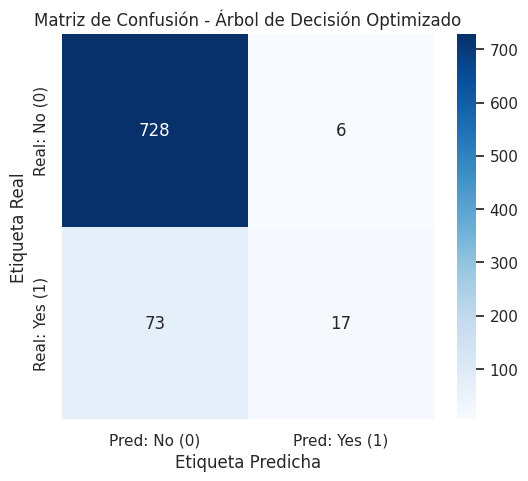

In [ ]:
# 5.4: Grafique la Matriz de Confusión
# ### TU CÓDIGO AQUÍ ###
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: No (0)', 'Pred: Yes (1)'],
            yticklabels=['Real: No (0)', 'Real: Yes (1)']) # Updated labels for clarity
plt.title('Matriz de Confusión - Árbol de Decisión Optimizado')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

## 6. ¿Cuáles son las Variables Más Relevantes?

Esta es la segunda parte de la solicitud del banco. Necesitamos explicar *por qué* el modelo toma sus decisiones.
- TN (728): Clientes que realmente dijeron “no” y el modelo predijo “no” (correctos).
FP (6): Clientes que realmente dijeron “no” pero el modelo predijo “sí” (llamadas desperdiciadas).
FN (73): Clientes que realmente dijeron “sí” pero el modelo predijo “no” (oportunidades perdidas).
TP (17): Clientes que realmente dijeron “sí” y el modelo predijo “sí” (aciertos).
El modelo tiene alta precisión para “no” (muy pocos falsos positivos), pero recall bajo para “sí” (solo 17 de 90 clientes que dijeron “sí” fueron detectados).
Esto confirma que el modelo es conservador: predice “sí” solo cuando está muy seguro, lo que reduce llamadas innecesarias pero deja pasar muchos prospectos.

- El modelo decide principalmente por recencia e historial de contacto (pdays, previous, campaign), seguido por perfil demográfico (edad, ocupación) y canal de contacto.
Acciones recomendadas: Priorizar clientes con contacto reciente y historial previo.
Limitar el número de intentos para evitar fatiga.
Ajustar guiones según segmento y canal.

### 6.1. Importancia de Variables (Árbol de Decisión)

--- Importancia de Variables (Árbol de Decisión) ---


,Feature,Importance
2,num__pdays,0.80
0,num__age,0.10
38,cat__contact_telephone,0.06
3,num__previous,0.04
1,num__campaign,0.00
5,cat__job_blue-collar,0.00
6,cat__job_entrepreneur,0.00
7,cat__job_housemaid,0.00
4,cat__job_admin.,0.00
9,cat__job_retired,0.00


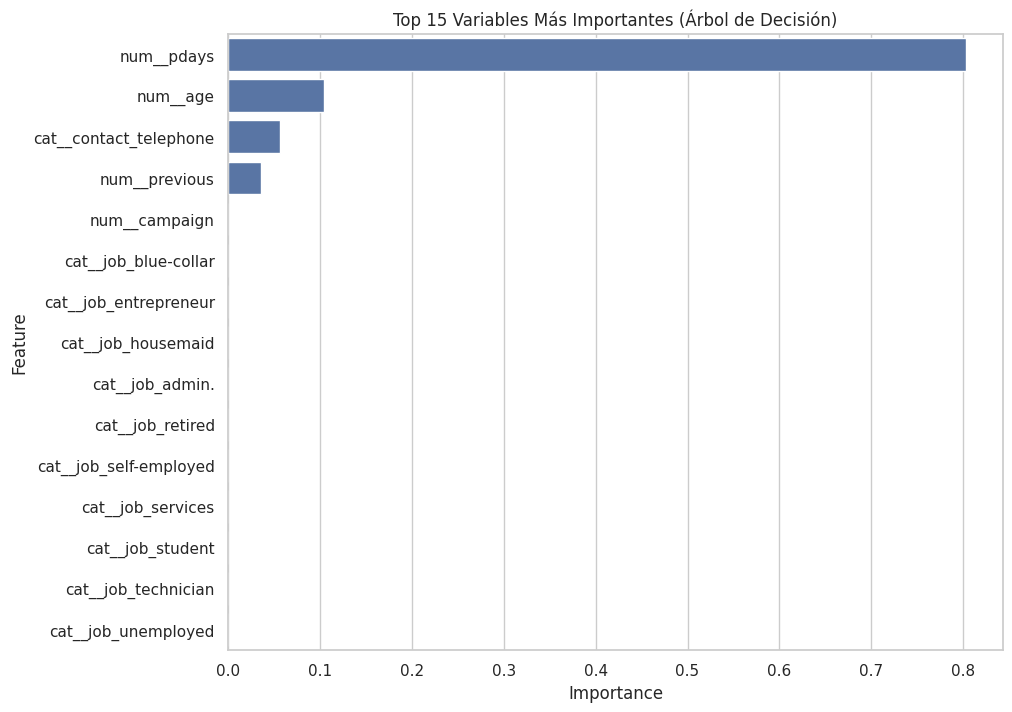

In [ ]:
# 6.1.1: Extraer el modelo de árbol y el preprocesador del pipeline optimizado
# (Ya tenemos 'best_tree_model')
# ### TU CÓDIGO AQUÍ ###
tree_model_final = best_tree_model.named_steps['model']

# 6.1.2: Obtener los nombres de las características DESPUÉS del OneHotEncoding
# ### TU CÓDIGO AQUÍ ###
feature_names = best_tree_model.named_steps['preprocessor'].get_feature_names_out()

# 6.1.3: Obtener las importancias (del 'final_tree_model')
# ### TU CÓDIGO AQUÍ ###
importances = tree_model_final.feature_importances_


# 6.1.4: Crear un DataFrame para visualizarlas, ordene de mayor a menor importancia
# ### TU CÓDIGO AQUÍ ###
tree_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("--- Importancia de Variables (Árbol de Decisión) ---")
display(tree_importance_df.head(15))

# 6.1.5: Grafique las 15 variables más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=tree_importance_df.head(15))
plt.title('Top 15 Variables Más Importantes (Árbol de Decisión)')
plt.show()

## 7. Conclusión y Recomendación de Negocio

Es hora de traducir nuestros hallazgos en una recomendación de negocio clara.

- El banco debe priorizar los clientes con contacto reciente y con historial previo, ajustando el umbral de decisión del modelo para aumentar la detección de clientes que aceptarían la oferta. Se sugiere ordenar la lista de llamadas por recencia (pdays) y número de interacciones anteriores (previous), reducir el umbral de probabilidad a aproximadamente 0.35 para mejorar el recall, y limitar el número de intentos por campaña a un máximo de tres para evitar fatiga. Esta estrategia permitirá captar más oportunidades sin incrementar significativamente los costos, optimizando la efectividad de las campañas y el retorno sobre la inversión.

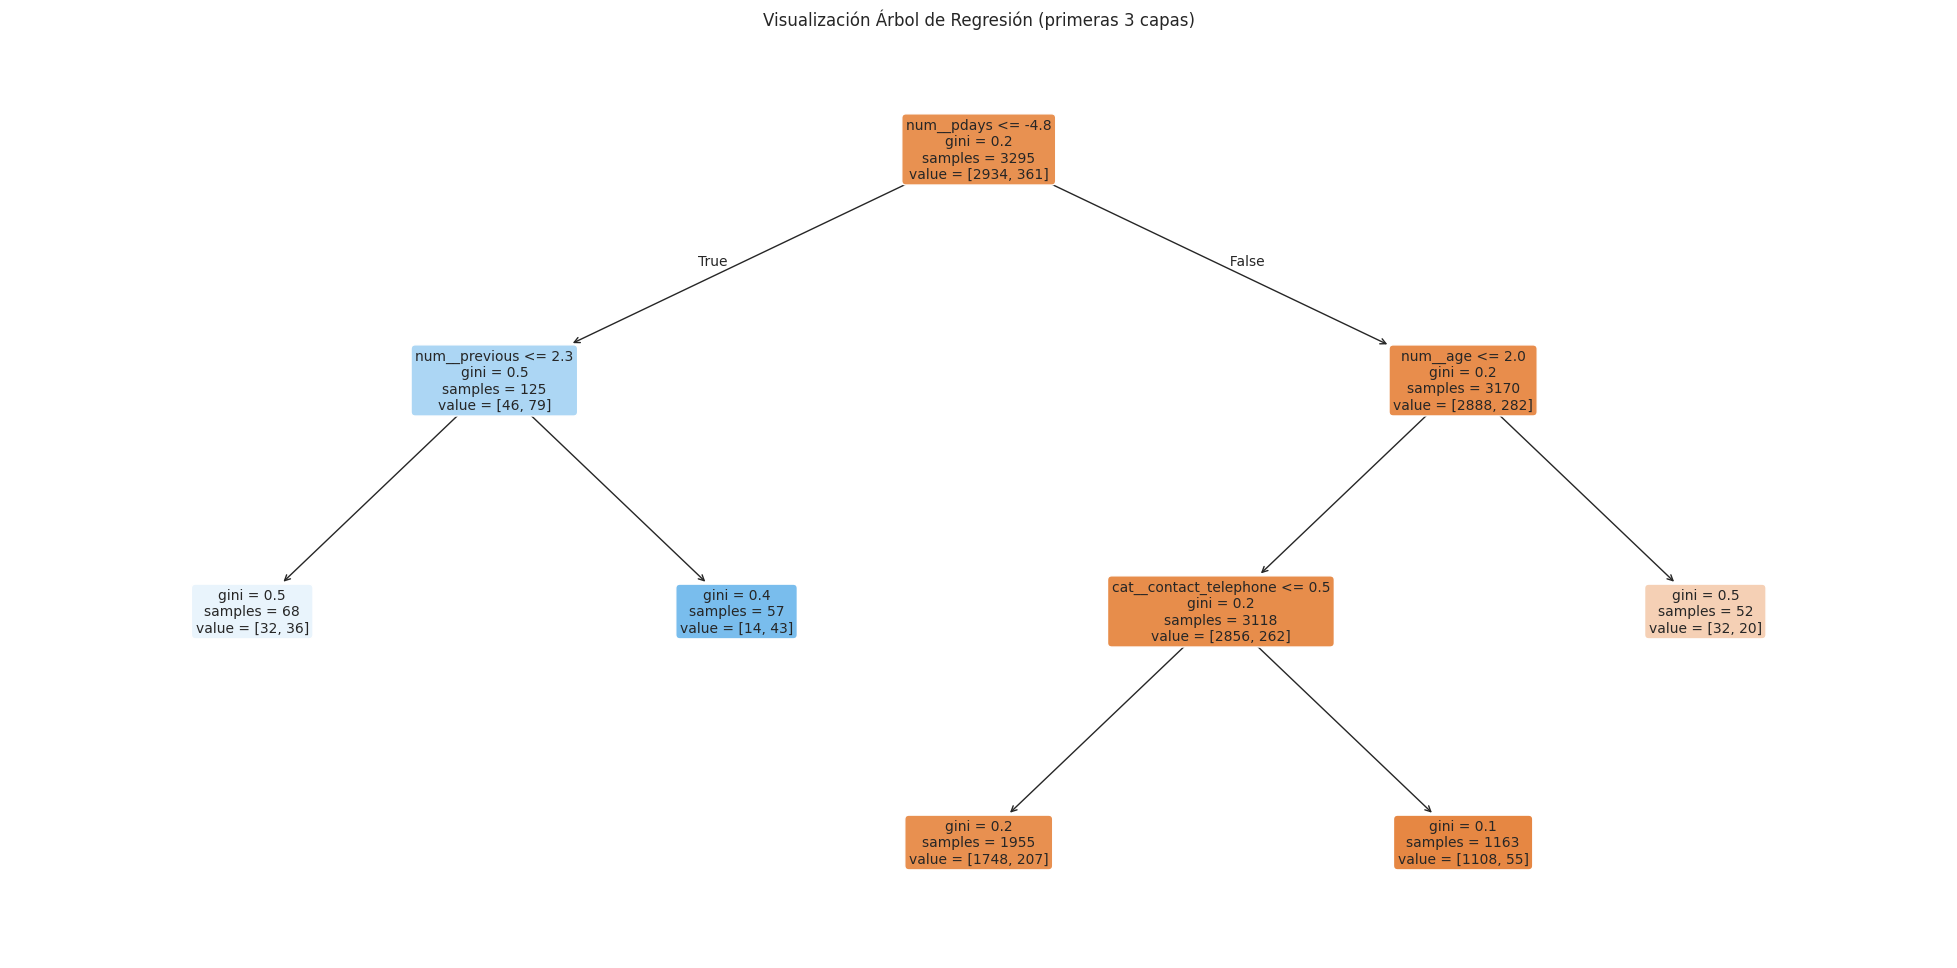

In [ ]:
# 7.1: Grafique el árbol de decisión final para encontrar reglas
# (Use max_depth=3 para que sea legible)
# ### TU CÓDIGO AQUÍ ###
feature_names = best_tree_model.named_steps['preprocessor'].get_feature_names_out()

plt.figure(figsize=(25, 12))
plot_tree(
    tree_model_final,
    max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    precision=1, # Decimales para mostrar en 'value'
    rounded=True
)
plt.title("Visualización Árbol de Regresión (primeras 3 capas)")
plt.show()

### **7.2: Conclusiones Consultoría**

Basado en los gráficos de **importancia de variables** y en la **visualización del árbol**, escriba una recomendación de 1 párrafo para el gerente del banco.

**Puntos a incluir:**
1.  ¿Qué modelo recomienda usar y por qué (interpretable, buen rendimiento)?
2.  ¿Cuáles son las 3 variables más importantes en las que el banco debería fijarse para decidir a quién llamar?
3.  Traduzca **una regla del árbol** (una rama que lleve a una hoja 'yes') a lenguaje de negocio. (Ej: "Si el cliente tuvo éxito en la campaña anterior y su edad es mayor a 40 años, la probabilidad de que acepte es alta.")

- Sugiero mantener un Árbol de Decisión optimizado como modelo principal porque ofrece buen rendimiento en la clase negativa sin sacrificar comprensión y, sobre todo, es altamente interpretable: permite ver exactamente qué variables y umbrales guían cada decisión y traducirlos a reglas de negocio accionables. Con base en las importancias y la visualización del árbol, las tres variables clave para decidir a quién llamar son: (1) pdays (recencia del último contacto), (2) previous (historial de interacciones previas) y **(3) el canal de contacto (contact, en particular si es teléfono fijo vs. celular), seguidas por edad como factor de segmentación. Una regla concreta del árbol que lleva a una hoja “yes” puede expresarse así: “Si el cliente fue contactado recientemente (p. ej., pdays ≤ 48), tiene historial de interacción (previous > 2) y lo abordamos por canal celular (mejor que teléfono fijo), la probabilidad de aceptar la oferta es alta.” Con esta guía, prioricemos en el call‑list a clientes con recencia alta + historial previo, usando canal celular y guiones adaptados por segmento de edad para maximizar conversiones.
